In [ ]:
# Install required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn streamlit

In [ ]:
# Core Python Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pickle


In [ ]:
# Load Parkinson's dataset
parkinsons_df = pd.read_csv('/content/parkinsons - parkinsons (1).csv')

# Load Kidney dataset
kidney_df = pd.read_csv('/content/kidney_disease - kidney_disease (1).csv')

# Load Liver dataset
liver_df = pd.read_csv('/content/indian_liver_patient - indian_liver_patient (1).csv')
# Show basic info
print("Parkinson's Data:", parkinsons_df.shape)
print("Kidney Data:", kidney_df.shape)
print("Liver Data:", liver_df.shape)


Parkinson's Data: (195, 24)
Kidney Data: (400, 26)
Liver Data: (583, 11)


In [ ]:
parkinsons_df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
kidney_df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
liver_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
#Dropping Unwanted column in Kidney dataset
X_kidney = kidney_df.drop(['id', 'classification'], axis=1)

In [ ]:
#Parkinson's
parkinsons_df.info()
parkinsons_df.describe()
parkinsons_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
#Kidney
kidney_df.info()
kidney_df.describe()
kidney_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [ ]:
#Liver
liver_df.info()
liver_df.describe().T
liver_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [ ]:
# Parkinson's: No categorical data, mostly numerical
# Drop or fill missing if any
parkinsons_df = parkinsons_df.dropna()
# Drop the 'name' column
parkinsons_df = parkinsons_df.drop(['name'], axis=1)
# Kidney: Fill missing & encode
kidney_df = kidney_df.fillna(method='ffill')
for col in kidney_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    kidney_df[col] = le.fit_transform(kidney_df[col])

# Liver: Fill missing & encode
liver_df = liver_df.fillna(method='ffill')
for col in liver_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    liver_df[col] = le.fit_transform(liver_df[col])


/tmp/ipython-input-2581961309.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  kidney_df = kidney_df.fillna(method='ffill')
/tmp/ipython-input-2581961309.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  liver_df = liver_df.fillna(method='ffill')


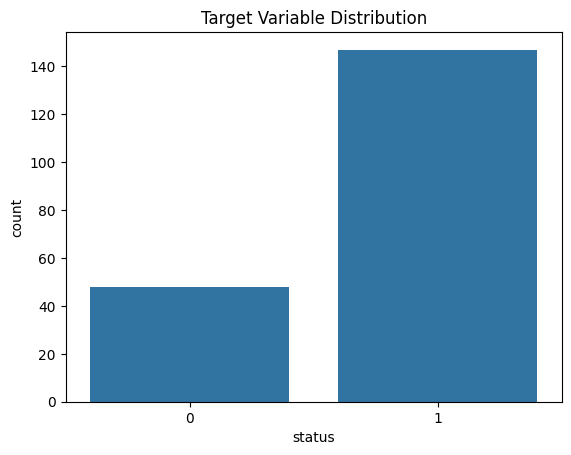

In [ ]:
# Visualize Target Distribution
sns.countplot(data=parkinsons_df, x='status')   # Parkinson's
plt.title('Target Variable Distribution')
plt.show()

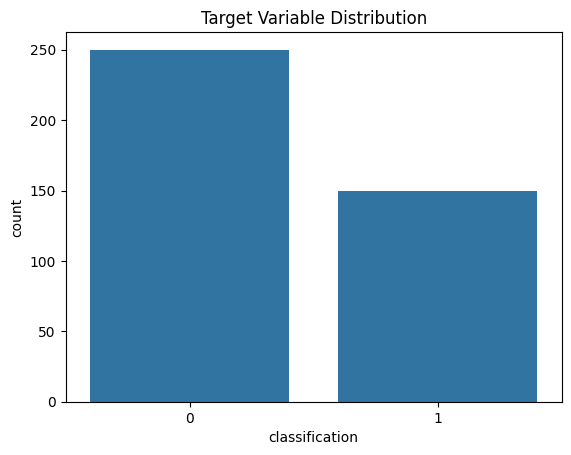

In [ ]:
sns.countplot(data=kidney_df, x='classification')
plt.title('Target Variable Distribution')
plt.show()

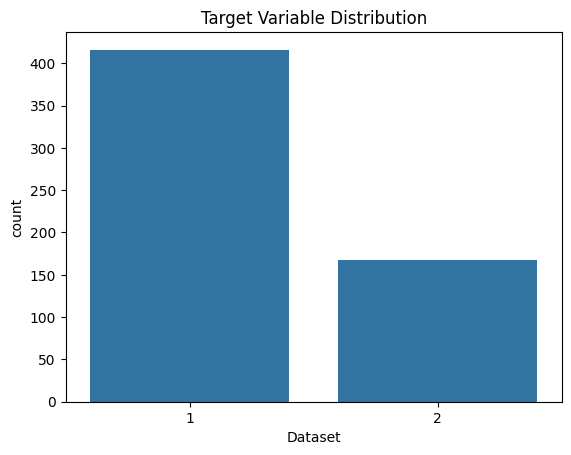

In [ ]:
sns.countplot(data=liver_df, x='Dataset')
plt.title('Target Variable Distribution')
plt.show()

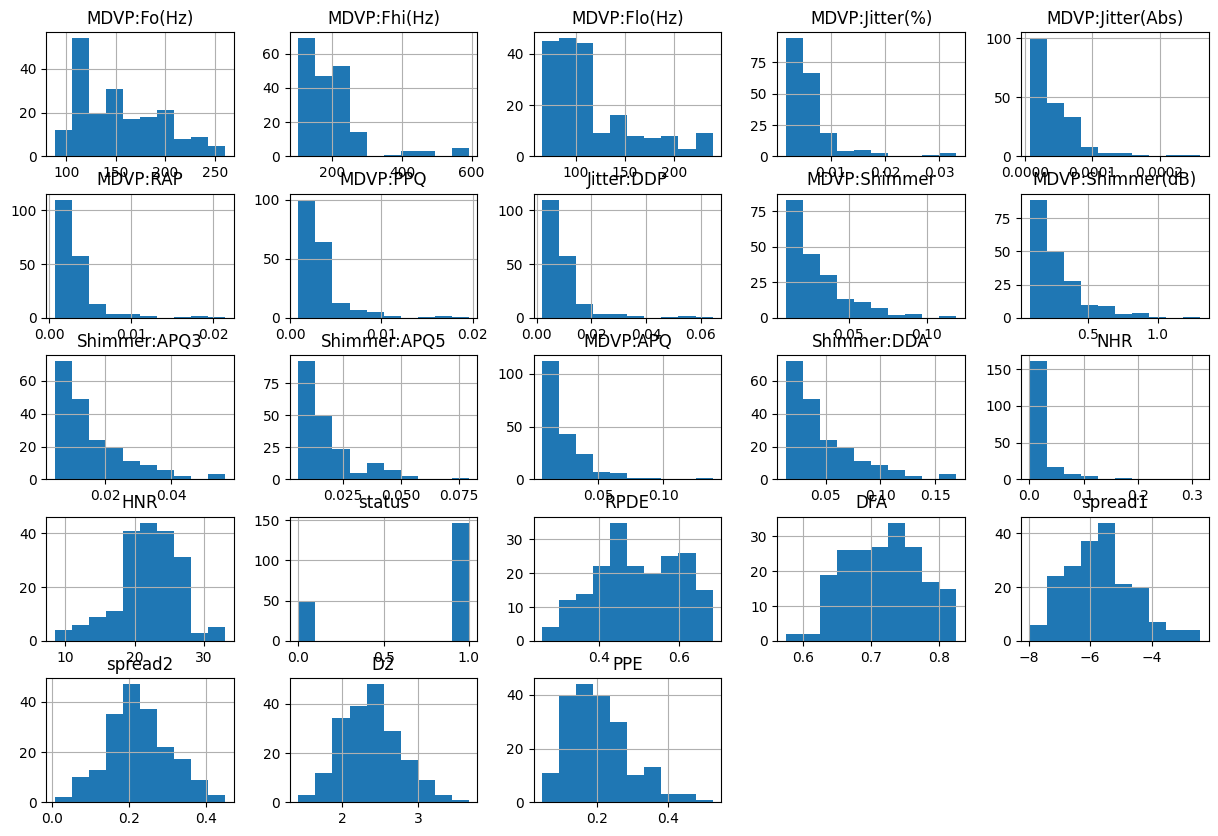

In [ ]:
# Example: Histogram for numeric columns
parkinsons_df.hist(figsize=(15, 10))
plt.show()

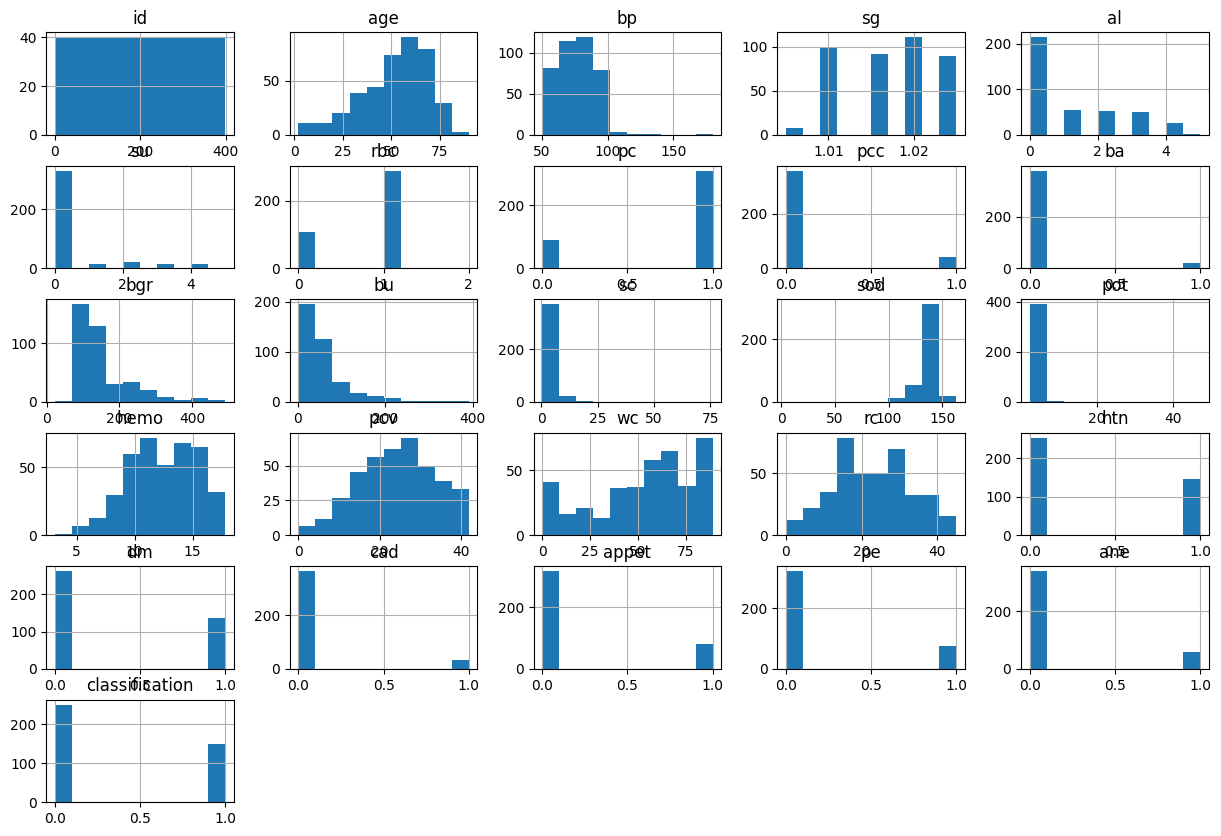

In [ ]:
kidney_df.hist(figsize=(15, 10))
plt.show()

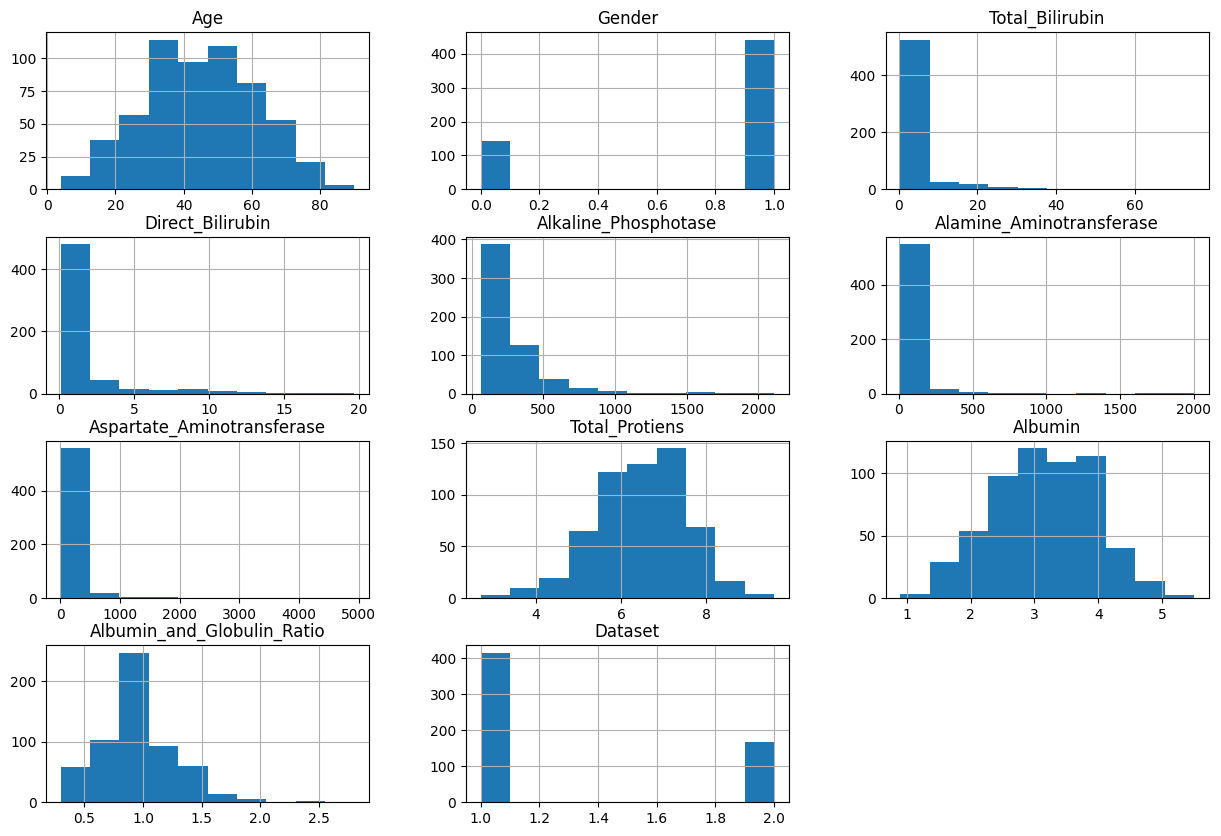

In [ ]:
liver_df.hist(figsize=(15, 10))
plt.show()

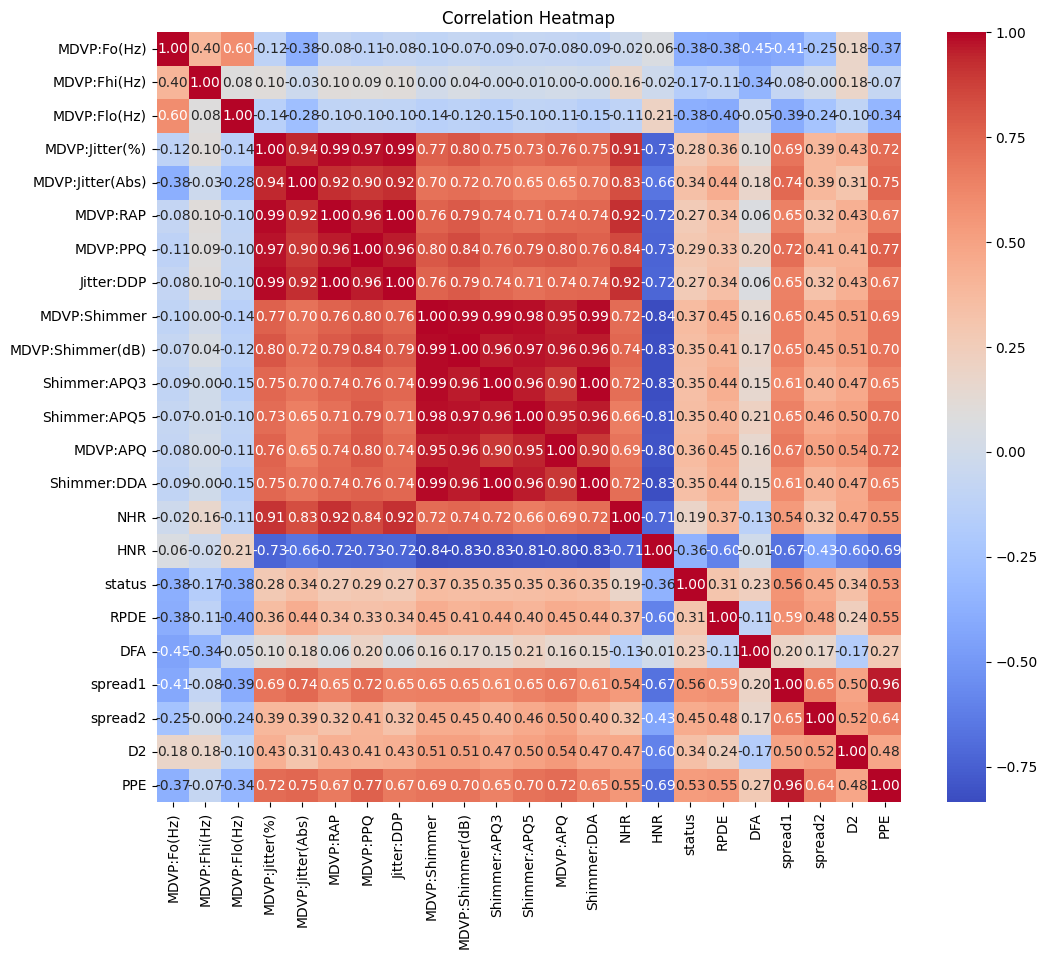

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(parkinsons_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

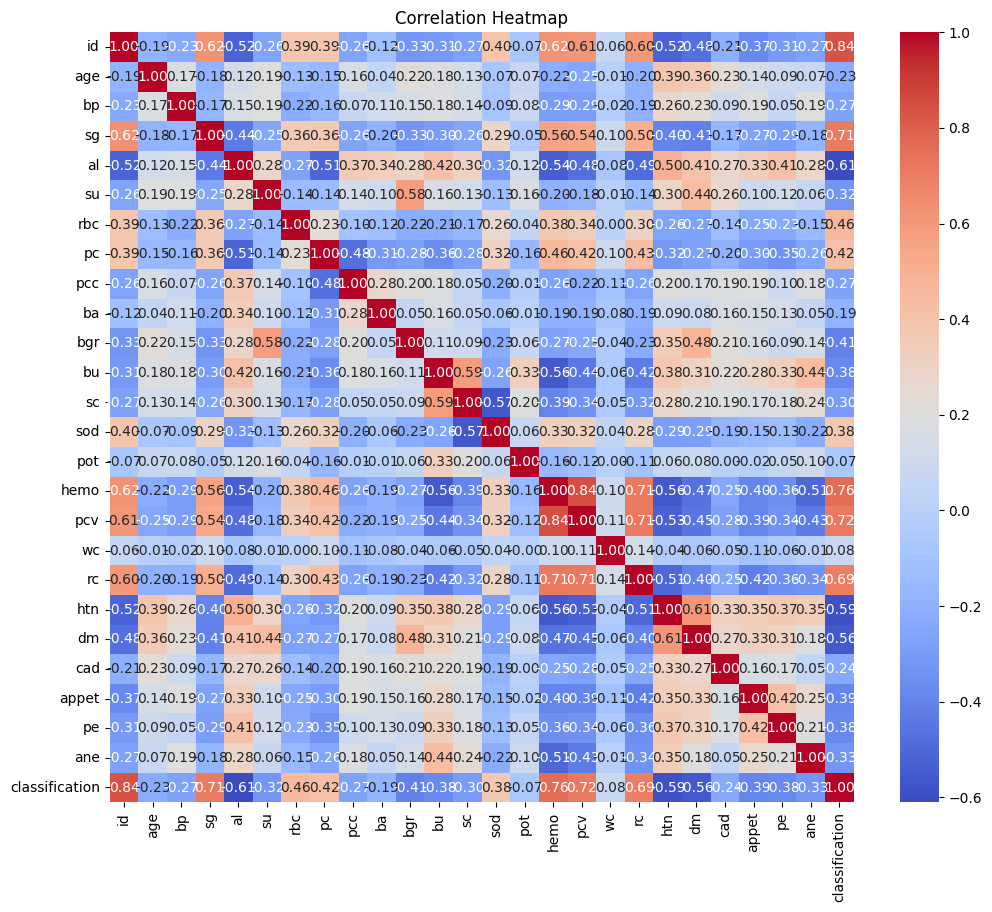

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(kidney_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Heatmap')

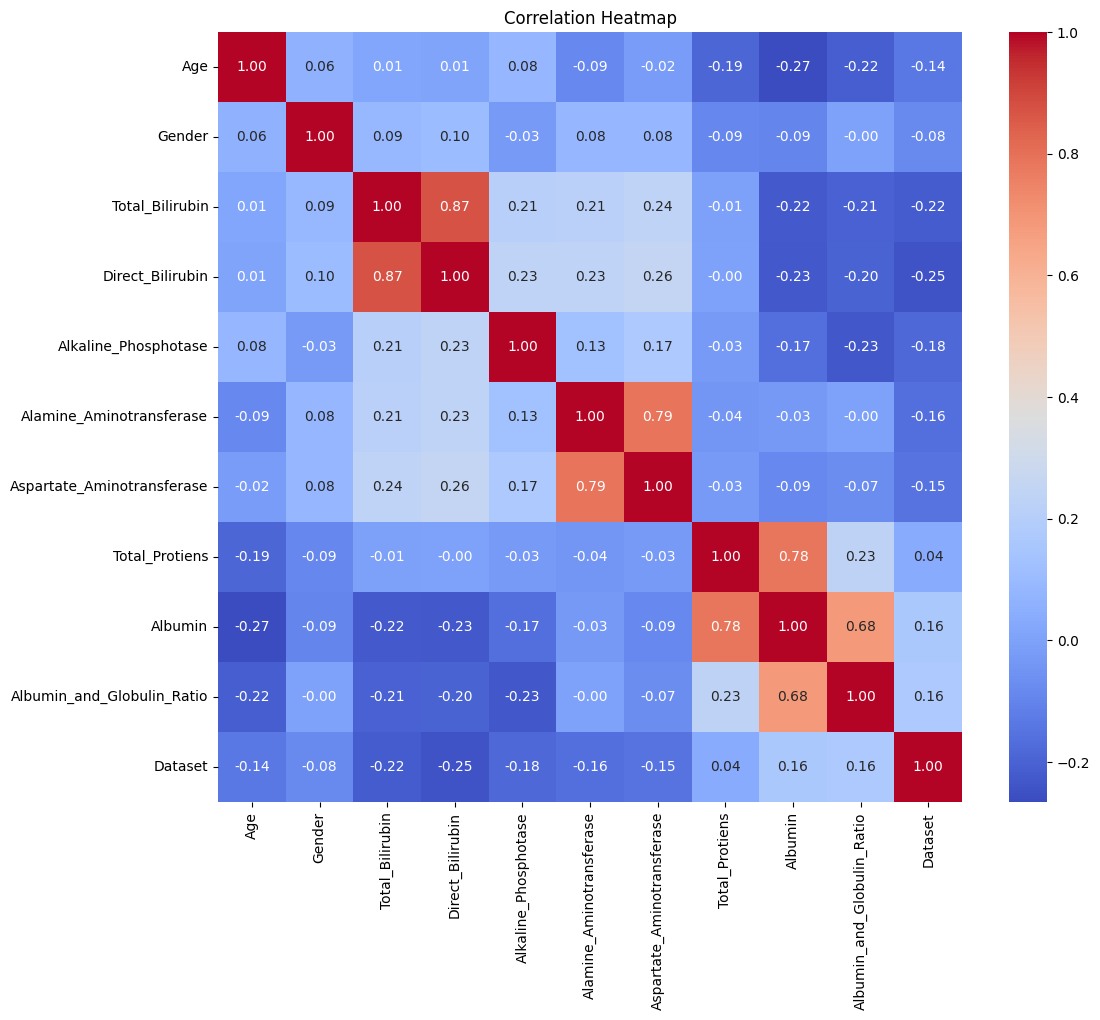

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(liver_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')

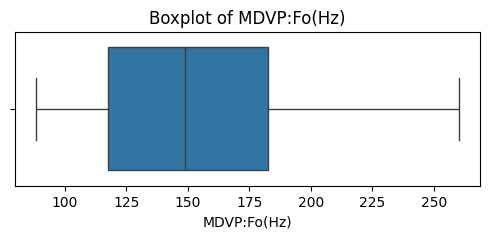

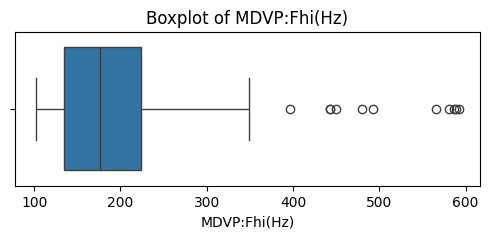

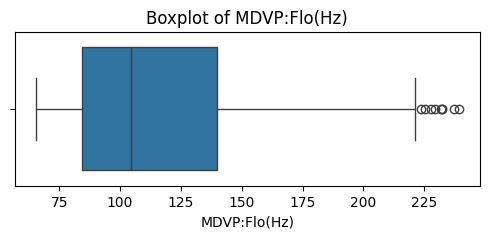

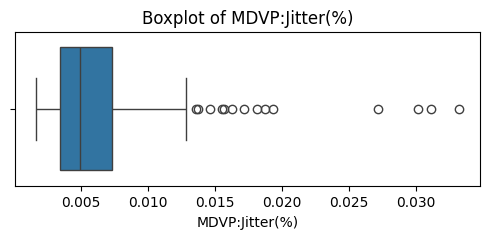

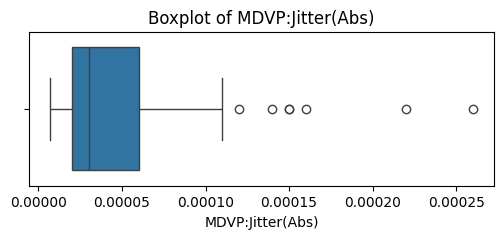

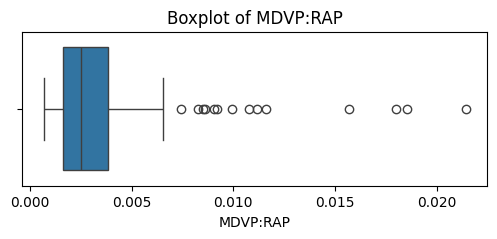

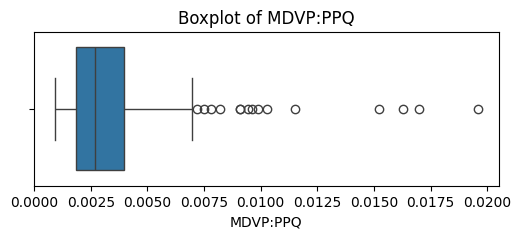

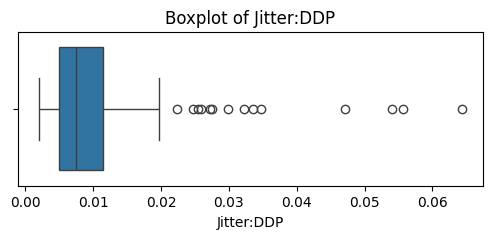

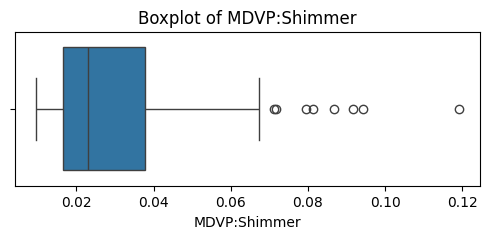

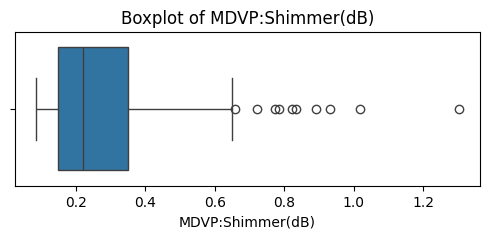

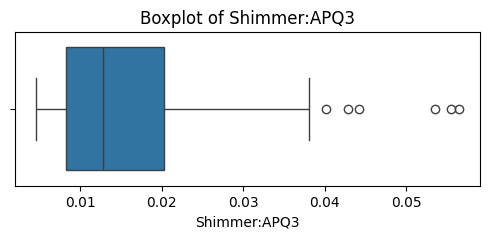

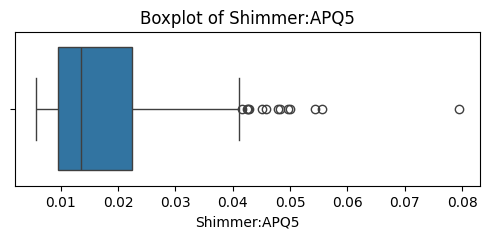

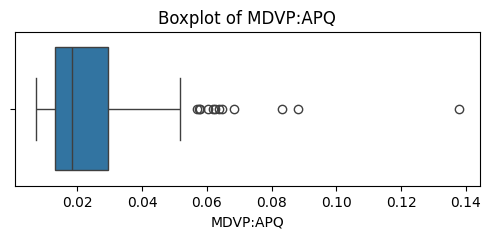

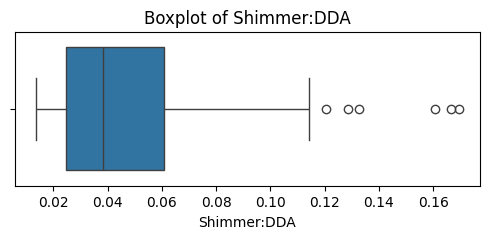

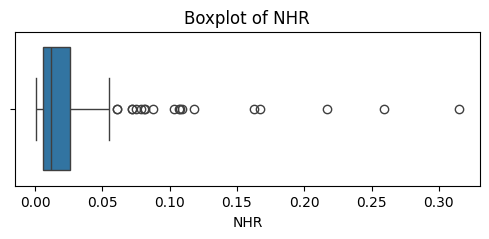

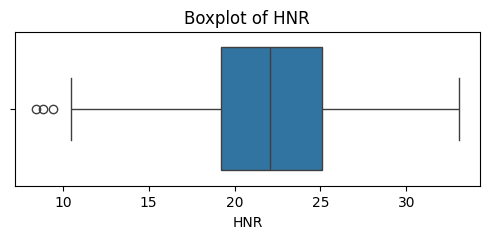

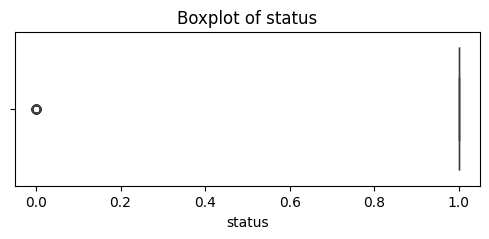

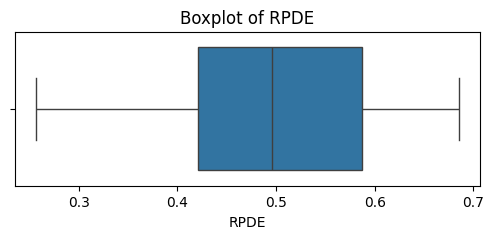

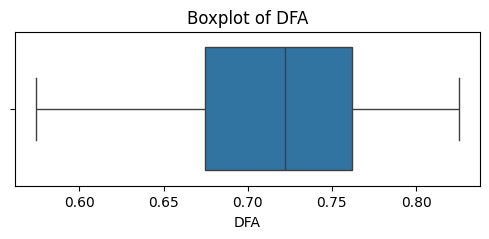

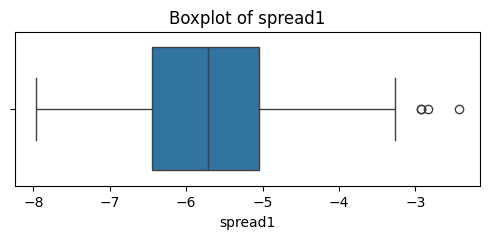

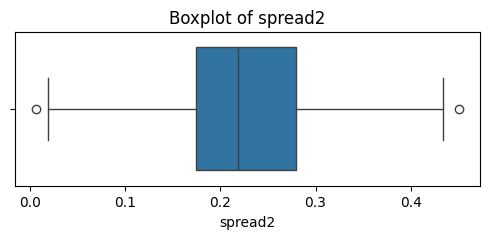

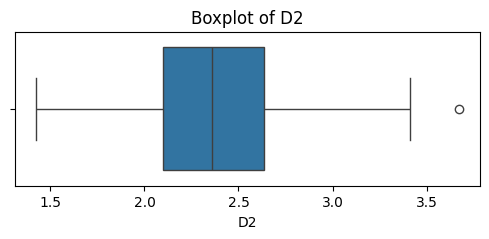

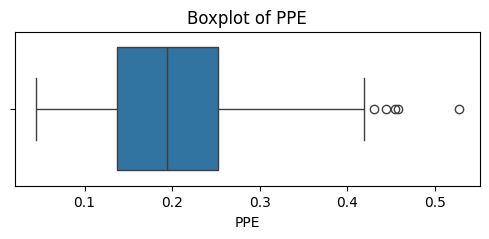

In [ ]:
# Boxplots for numeric columns
numeric_cols = parkinsons_df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=parkinsons_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

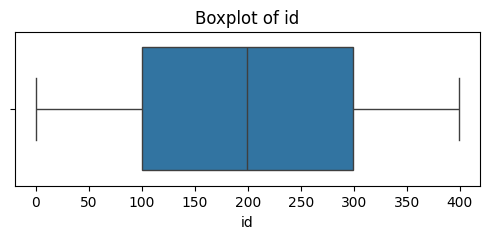

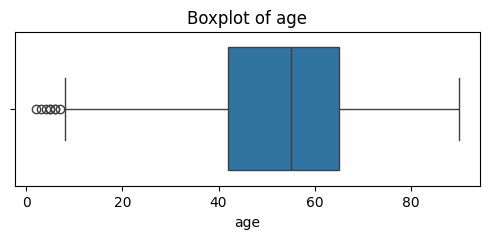

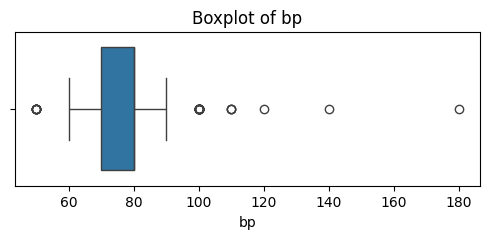

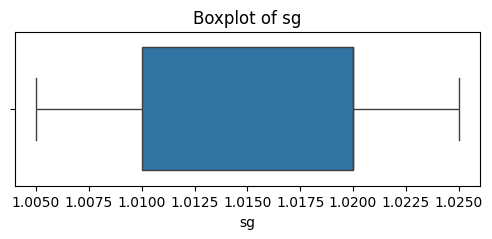

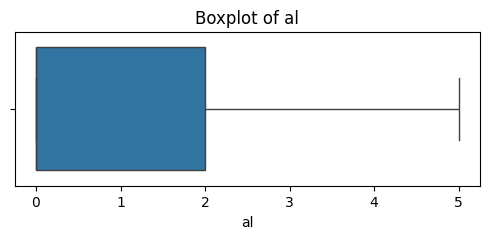

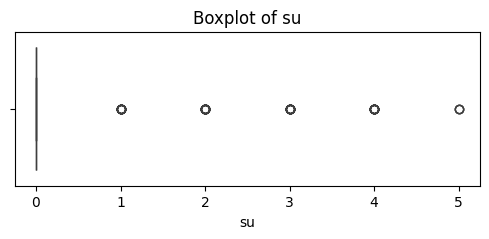

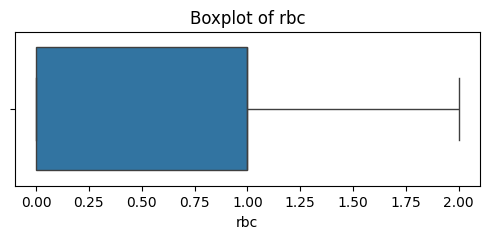

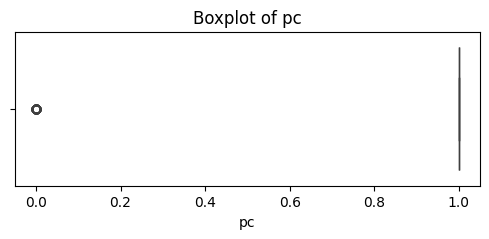

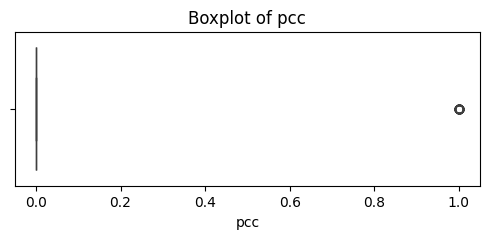

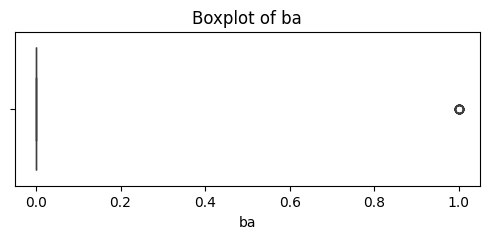

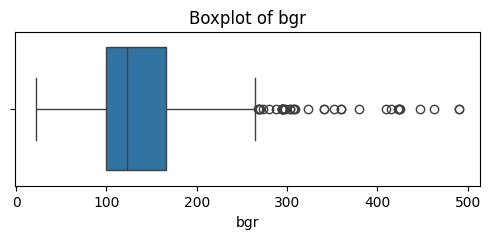

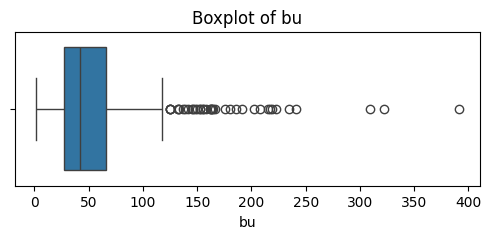

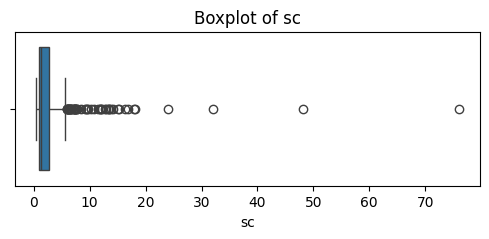

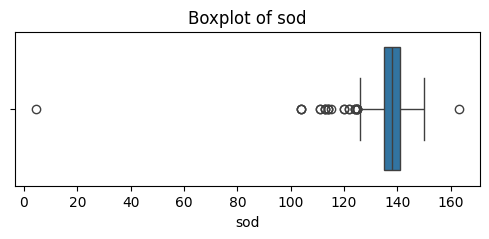

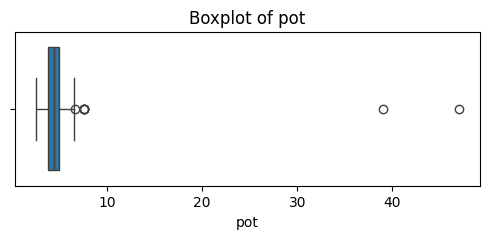

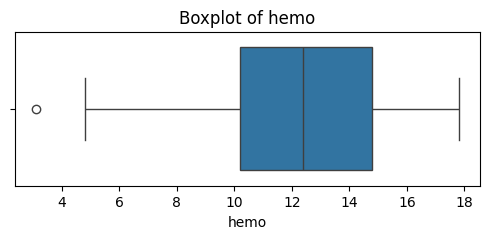

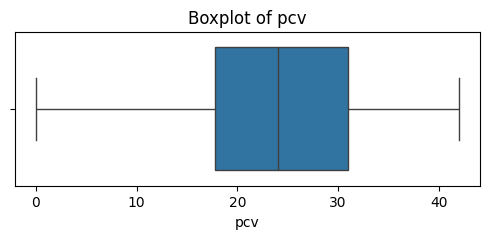

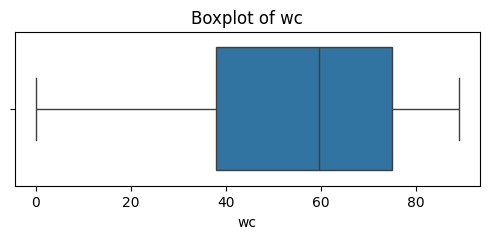

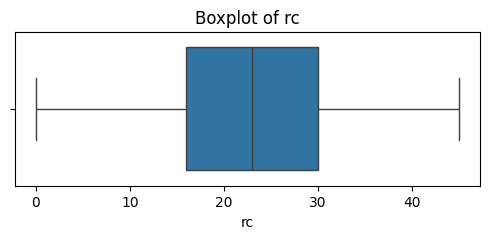

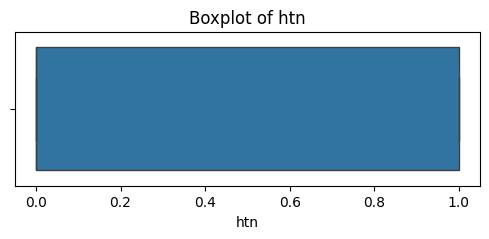

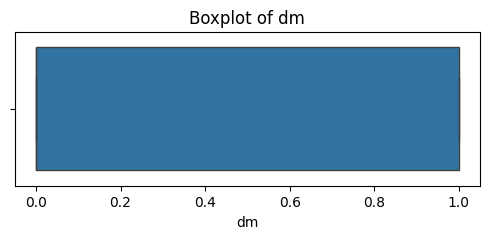

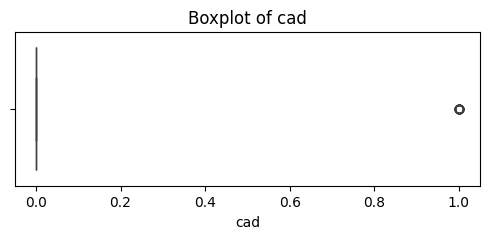

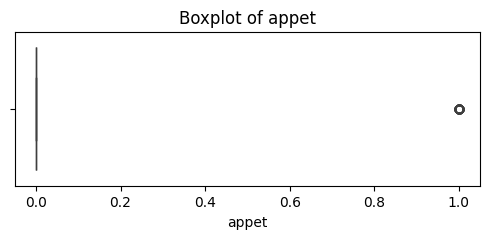

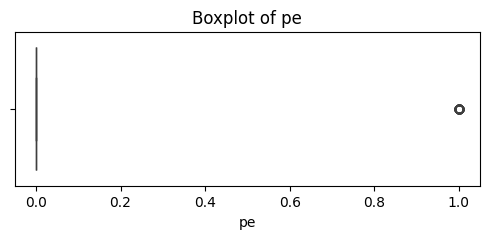

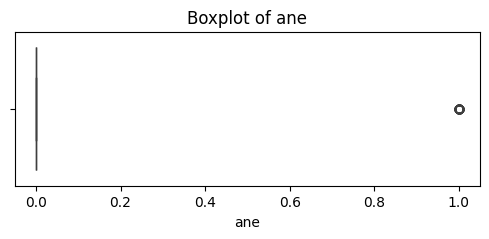

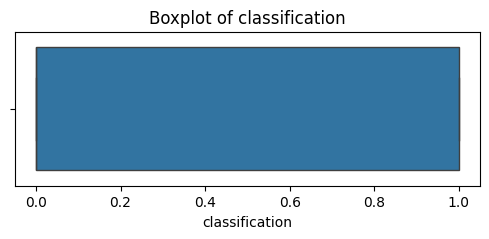

In [ ]:
numeric_cols = kidney_df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=kidney_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

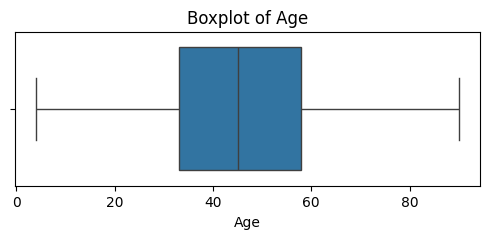

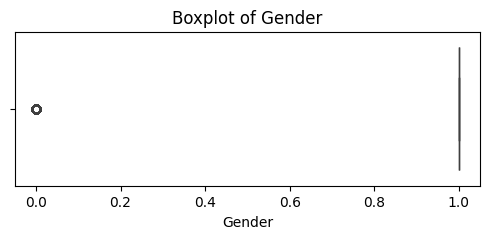

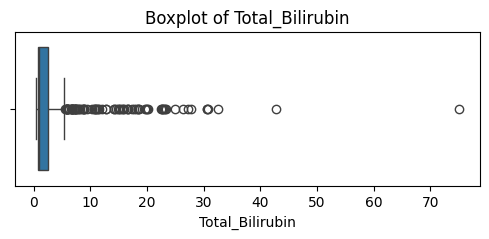

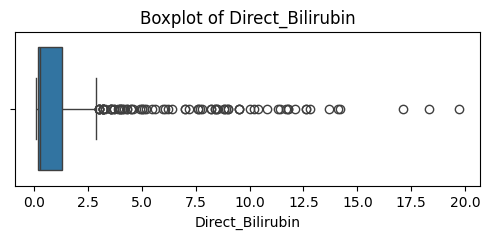

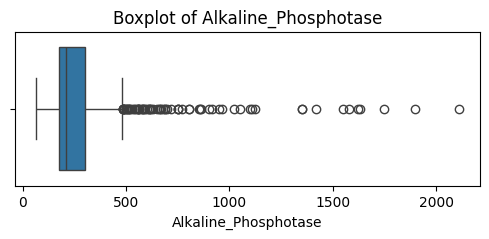

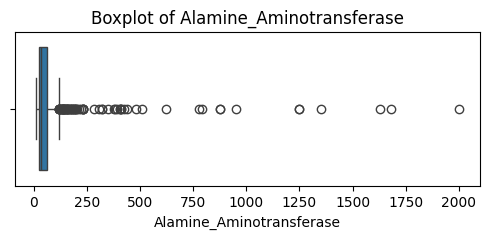

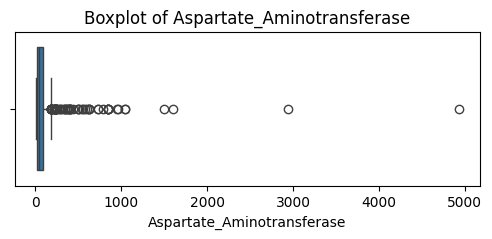

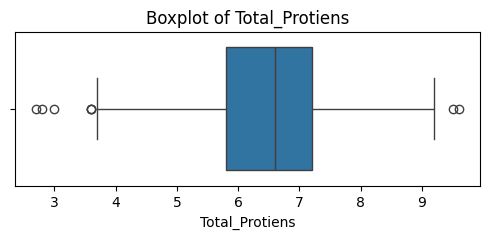

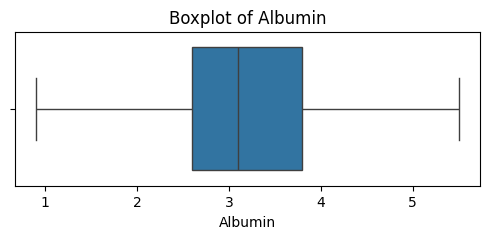

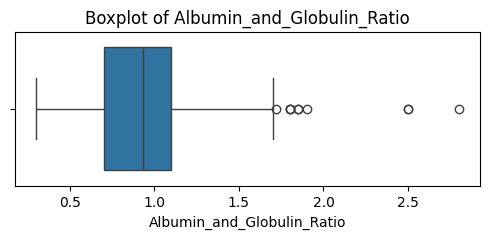

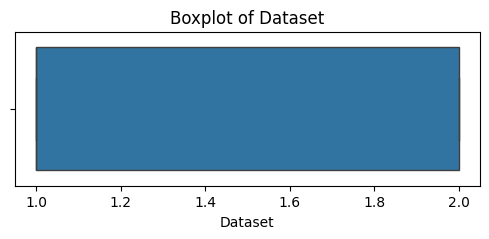

In [ ]:
numeric_cols = liver_df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=liver_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
scaler = StandardScaler()

# Parkinson's
X_p = parkinsons_df.drop(['status'], axis=1)
y_p = parkinsons_df['status']
X_p = scaler.fit_transform(X_p)

# Kidney
X_k = kidney_df.drop(['id','classification'], axis=1)
y_k = kidney_df['classification']
X_k = scaler.fit_transform(X_k)

# Liver
X_l = liver_df.drop(['Dataset'], axis=1)
y_l = liver_df['Dataset'] - 1 # Subtract 1 to make the target variable 0 and 1
X_l = scaler.fit_transform(X_l)

In [ ]:
# Parkinson's
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2, random_state=42)

# Kidney
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_k, y_k, test_size=0.2, random_state=42)

# Liver
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size=0.2, random_state=42)


In [ ]:
# Parkinson's: Logistic Regression
model_p = LogisticRegression()
model_p.fit(X_train_p, y_train_p)

# Kidney: Random Forest
model_k = RandomForestClassifier()
model_k.fit(X_train_k, y_train_k)

# Liver: XGBoost
model_l = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_l.fit(X_train_l, y_train_l)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:10:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Parkinson's
pred_p = model_p.predict(X_test_p)
print("Parkinson's Accuracy:", accuracy_score(y_test_p, pred_p))
print(classification_report(y_test_p, pred_p))
print(confusion_matrix(y_test_p, pred_p))
print("=====================================================================")
# Kidney
pred_k = model_k.predict(X_test_k)
print("Kidney Accuracy:", accuracy_score(y_test_k, pred_k))
print(classification_report(y_test_k, pred_k))
print(confusion_matrix(y_test_k, pred_k))
print("======================================================================")
# Liver
pred_l = model_l.predict(X_test_l)
print("Liver Accuracy:", accuracy_score(y_test_l, pred_l))
print(classification_report(y_test_l, pred_l))
print(confusion_matrix(y_test_l, pred_l))


Parkinson's Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

[[ 3  4]
 [ 0 32]]
Kidney Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[52  0]
 [ 0 28]]
Liver Accuracy: 0.717948717948718
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        87
           1       0.43      0.33      0.38        30

    accuracy                           0.72     

In [ ]:
with open('parkinson_model.pkl', 'wb') as f:
    pickle.dump(model_p, f)

with open('kidney_model.pkl', 'wb') as f:
    pickle.dump(model_k, f)

with open('liver_model.pkl', 'wb') as f:
    pickle.dump(model_l, f)

In [ ]:
!pip install streamlit

In [ ]:
%%writefile Multipledisease_app.py
import streamlit as st
import pickle
import numpy as np

# Load models
parkinson_model = pickle.load(open('/content/parkinson_model.pkl', 'rb'))
kidney_model = pickle.load(open('/content/kidney_model.pkl', 'rb'))
liver_model = pickle.load(open('/content/liver_model.pkl', 'rb'))

st.title("🩺 Multiple Disease Prediction System")

# Sidebar navigation
option = st.sidebar.selectbox("Select Disease to Predict", ["Parkinson's", "Kidney Disease", "Liver Disease"])

# ------------------------------
# 1️⃣ Parkinson's Inputs (22)
# ------------------------------
if option == "Parkinson's":
    st.header("Parkinson's Disease Prediction")

    fo = st.number_input('MDVP:Fo(Hz)')
    fhi = st.number_input('MDVP:Fhi(Hz)')
    flo = st.number_input('MDVP:Flo(Hz)')
    jitter_percent = st.number_input('MDVP:Jitter(%)')
    jitter_abs = st.number_input('MDVP:Jitter(Abs)')
    rap = st.number_input('MDVP:RAP')
    ppq = st.number_input('MDVP:PPQ')
    ddp = st.number_input('Jitter:DDP')
    shimmer = st.number_input('MDVP:Shimmer')
    shimmer_db = st.number_input('MDVP:Shimmer(dB)')
    apq3 = st.number_input('Shimmer:APQ3')
    apq5 = st.number_input('Shimmer:APQ5')
    apq = st.number_input('MDVP:APQ')
    dda = st.number_input('Shimmer:DDA')
    nhr = st.number_input('NHR')
    hnr = st.number_input('HNR')
    rpde = st.number_input('RPDE')
    dfa = st.number_input('DFA')
    spread1 = st.number_input('spread1')
    spread2 = st.number_input('spread2')
    d2 = st.number_input('D2')
    ppe = st.number_input('PPE')

    parkinson_input = np.array([[fo, fhi, flo, jitter_percent, jitter_abs, rap, ppq, ddp,
                                 shimmer, shimmer_db, apq3, apq5, apq, dda,
                                 nhr, hnr, rpde, dfa, spread1, spread2, d2, ppe]])

    if st.button('Predict Parkinson\'s'):
        result = parkinson_model.predict(parkinson_input)
        st.success("Prediction: {}".format("Parkinson's Detected" if result[0] == 1 else "Healthy"))

# ------------------------------
# 2️⃣ Kidney Inputs (Example: typical CKD dataset)
# ------------------------------
elif option == "Kidney Disease":
    st.header("Kidney Disease Prediction")

    age = st.number_input('Age')
    bp = st.number_input('Blood Pressure')
    sg = st.number_input('Specific Gravity')
    al = st.number_input('Albumin')
    su = st.number_input('Sugar')
    rbc = st.selectbox('Red Blood Cells', ['normal', 'abnormal'])
    pc = st.selectbox('Pus Cell', ['normal', 'abnormal'])
    pcc = st.selectbox('Pus Cell Clumps', ['present', 'notpresent'])
    ba = st.selectbox('Bacteria', ['present', 'notpresent'])
    bgr = st.number_input('Blood Glucose Random')
    bu = st.number_input('Blood Urea')
    sc = st.number_input('Serum Creatinine')
    sod = st.number_input('Sodium')
    pot = st.number_input('Potassium')
    hemo = st.number_input('Hemoglobin')
    pcv = st.number_input('Packed Cell Volume')
    wc = st.number_input('White Blood Cell Count')
    rc = st.number_input('Red Blood Cell Count')
    htn = st.selectbox('Hypertension', ['yes', 'no'])
    dm = st.selectbox('Diabetes Mellitus', ['yes', 'no'])
    cad = st.selectbox('Coronary Artery Disease', ['yes', 'no'])
    appet = st.selectbox('Appetite', ['good', 'poor'])
    pe = st.selectbox('Pedal Edema', ['yes', 'no'])
    ane = st.selectbox('Anemia', ['yes', 'no'])

    # Encode categories as you did in training
    label_map = {'normal': 0, 'abnormal': 1, 'present': 1, 'notpresent': 0, 'yes': 1, 'no': 0, 'good': 1, 'poor': 0}
    rbc = label_map[rbc]
    pc = label_map[pc]
    pcc = label_map[pcc]
    ba = label_map[ba]
    htn = label_map[htn]
    dm = label_map[dm]
    cad = label_map[cad]
    appet = label_map[appet]
    pe = label_map[pe]
    ane = label_map[ane]

    kidney_input = np.array([[age, bp, sg, al, su, rbc, pc, pcc, ba,
                              bgr, bu, sc, sod, pot, hemo, pcv, wc, rc,
                              htn, dm, cad, appet, pe, ane]])

    if st.button('Predict Kidney Disease'):
        result = kidney_model.predict(kidney_input)
        st.success("Prediction: {}".format("CKD Detected" if result[0] == 1 else "No CKD"))

# ------------------------------
# 3️⃣ Liver Inputs (Example: ILPD dataset)
# ------------------------------
elif option == "Liver Disease":
    st.header("Liver Disease Prediction")

    age = st.number_input('Age')
    gender = st.selectbox('Gender', ['Male', 'Female'])
    tb = st.number_input('Total Bilirubin')
    db = st.number_input('Direct Bilirubin')
    alkphos = st.number_input('Alkaline Phosphotase')
    sgpt = st.number_input('Alamine Aminotransferase')
    sgot = st.number_input('Aspartate Aminotransferase')
    tp = st.number_input('Total Proteins')
    alb = st.number_input('Albumin')
    ag_ratio = st.number_input('Albumin and Globulin Ratio')

    # Encode Gender same way as training
    gender = 1 if gender == 'Male' else 0

    liver_input = np.array([[age, gender, tb, db, alkphos, sgpt, sgot, tp, alb, ag_ratio]])

    if st.button('Predict Liver Disease'):
        result = liver_model.predict(liver_input)
        st.success("Prediction: {}".format("Liver Disease Detected" if result[0] == 1 else "Healthy Liver"))



Overwriting Multipledisease_app.py


In [ ]:
!pip install streamlit pyngrok --quiet

In [ ]:
!ngrok authtoken 2u8bzQfCvr5vlLyJvy0HCpQHUQ9_7H4DKQQBBGoPU8QbsaE7L

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import time
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print(f"Streamlit is running at: {public_url}")

!streamlit run Multipledisease_app.py --server.port 8501 --server.headless true &

time.sleep(3)

Streamlit is running at: NgrokTunnel: "https://afec6ea2c4af.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.199.34.164:8501

  Stopping...


KeyboardInterrupt: 